## Fit difference
1. chosen experiments were Reversed Fourier Transform from R = 0~4.55 $\AA$ in each sample experiment.
2. Fitting process was carried out using differential revolution method. And this fitting process was carried out for 5000 times to achieve the best result.
3. the difference between 'experiemnt' $\chi$ and Fit result will be plotted to compare among Regular sample, M311 and M322. 
4. The Fourier Transform of $\chi$ difference will also be compared among samples.

### Package needed


In [ ]:
import numpy as np
from matplotlib import pyplot as plt
import glob
from xafs.FT import *

### import fit result 

In [8]:
data_path = '/Users/Sophia/ownCloud/PhD/Statistic Analysis/CdS/'
figure_path = '/Users/Sophia/ownCloud/PhD/Statistic Analysis/CdS/figure/'
filelist = glob.glob(data_path+'athena*_fit.dat')


data_dic={}
for file in filelist:
    print(file)
    data_dic[file[57:-8]]=np.genfromtxt(file)


/Users/Sophia/ownCloud/PhD/Statistic Analysis/CdS/athena_M322_fit.dat
/Users/Sophia/ownCloud/PhD/Statistic Analysis/CdS/athena_R_fit.dat
/Users/Sophia/ownCloud/PhD/Statistic Analysis/CdS/athena_bulk_12sh_fit.dat
/Users/Sophia/ownCloud/PhD/Statistic Analysis/CdS/athena_M311_fit.dat
/Users/Sophia/ownCloud/PhD/Statistic Analysis/CdS/athena_bulk_fit.dat


### function: Plot chi difference and FT difference 

In [9]:
def plot_chi(file):
    data = data_dic[file]
    plt.plot(data[:,0],data[:,3]*data[:,0]**2,linewidth=0.5,label=file)

def plot_FT(file):
    data = data_dic[file]
    r,amp,real,imag = calcfft(data[:,0],data[:,3]*data[:,0]**3,kmin=2.3,kmax=15.5)
    plt.plot(r,amp,linewidth = 0.5,label=file)

### Function: Plot

In [10]:
def plot_fit_diff(file_list):
    plt.figure()
    
    plt.subplot(2,1,1)
    for file in filelist:
        plot_chi(file[57:-8])
    plt.xlim([1,17])
    plt.ylim([-0.2,0.2])
    plt.xlabel('k ($\AA$)')
    plt.ylabel('$k^2\chi(k)$')
    plt.legend(loc='upper right')
    
    plt.subplot(2,1,2)
    for file in filelist:
        plot_FT(file[57:-8])
    plt.xlim([0,5])
    plt.xlabel('Radial distance ($\AA$)')
    plt.yticks([])
    plt.legend(loc='upper right')
    plt.tight_layout()
    
        

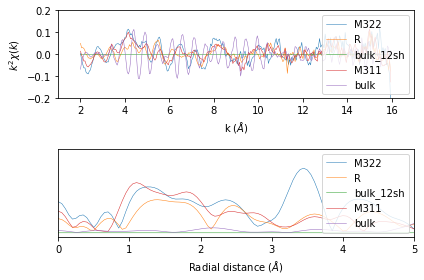

In [11]:
plot_fit_diff(filelist)
plt.savefig(figure_path+'fit_difference.pdf',format='pdf')